In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('house_rental_data.csv.txt')

In [3]:
data.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [4]:
data.head(10)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
5,6,1127.886,11,12,4,2,2,148000
6,7,1352.040,5,7,3,2,1,58000
7,8,757.854,5,14,1,0,1,48000
8,9,1152.792,10,12,3,2,2,45000
9,10,1423.200,4,5,4,2,2,65000


In [5]:
del data['Unnamed: 0']
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
import seaborn as sns

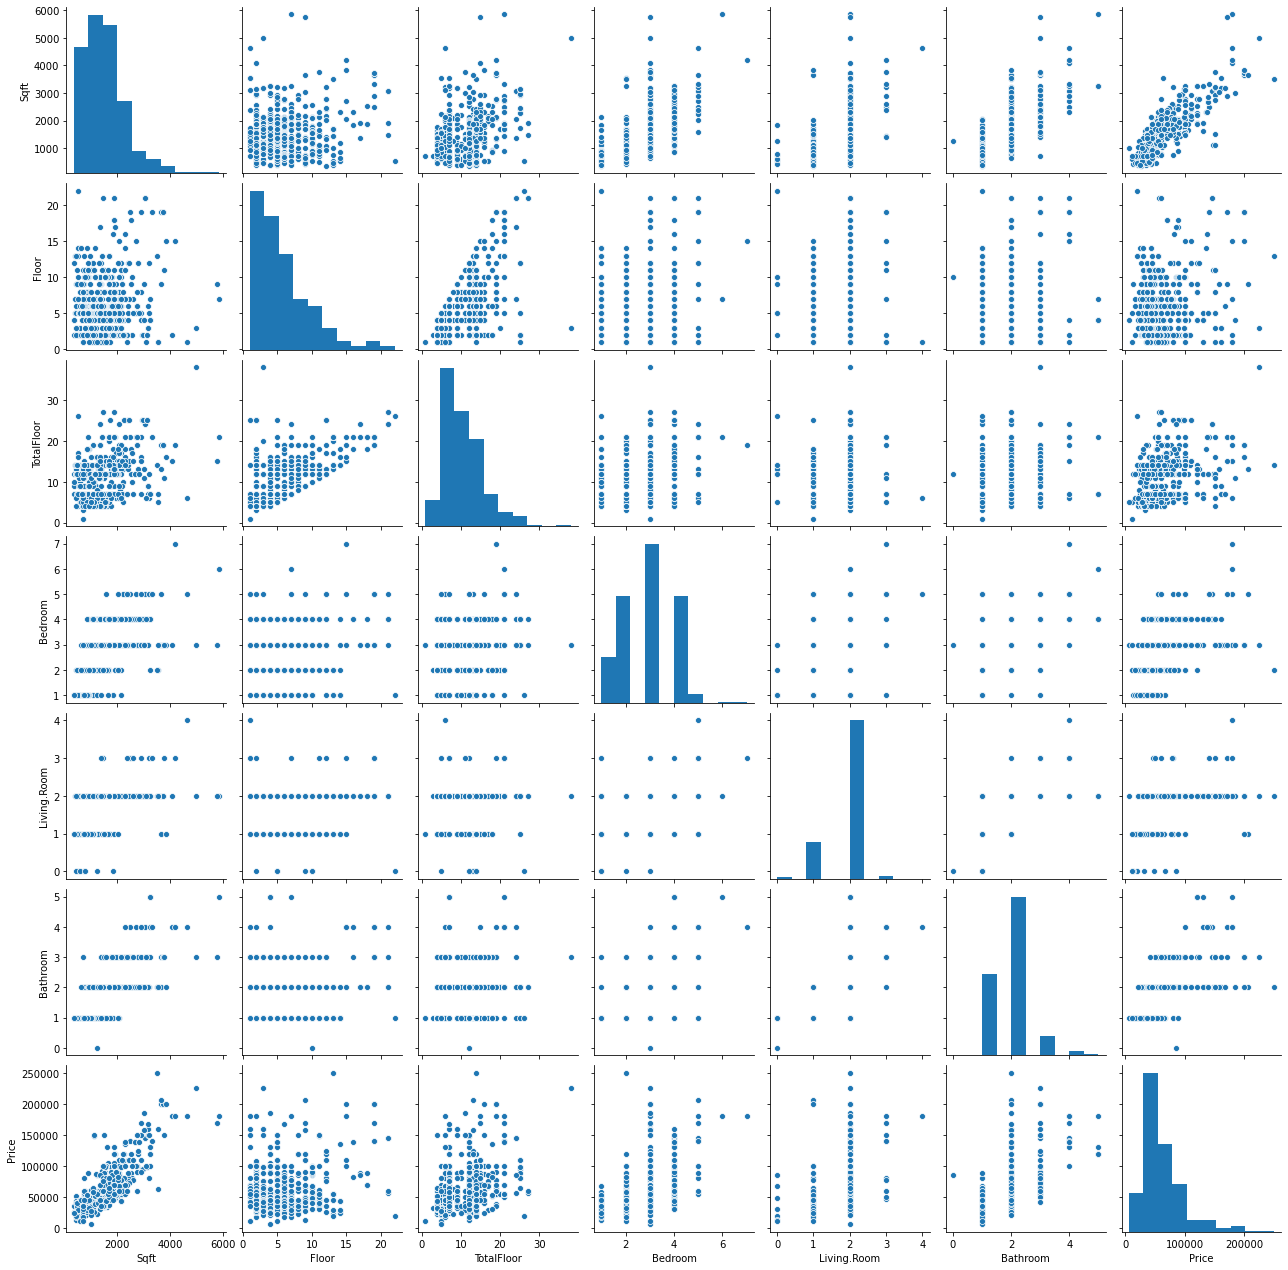

In [7]:
sns.pairplot(data)

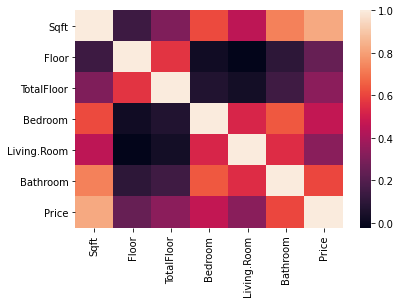

In [8]:
sns.heatmap(data.corr())

In [9]:
data.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [10]:
x=data.iloc[:,0:6].values
y=data.iloc[:,6].values
x_train ,x_test, y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)

In [11]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

k = 1 rmse= 18100.738494934827
k = 2 rmse= 17134.88734097731
k = 3 rmse= 17318.48900693141
k = 4 rmse= 17536.21764357219
k = 5 rmse= 17701.753554235347
k = 6 rmse= 17935.70244915838
k = 7 rmse= 18221.20795959702
k = 8 rmse= 18905.64279122619
k = 9 rmse= 19385.275964144756
k = 10 rmse= 19918.155548924773
k = 11 rmse= 19879.507955225323
k = 12 rmse= 19417.93715244902
k = 13 rmse= 19612.213300042196
k = 14 rmse= 20201.463845708127
k = 15 rmse= 20352.80712062857
k = 16 rmse= 20350.2225188976
k = 17 rmse= 20247.537292016368
k = 18 rmse= 20390.934863964612
k = 19 rmse= 20556.097304172297

optimal value of k is---> 2


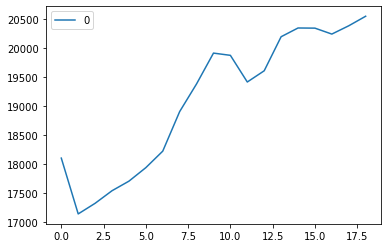

In [13]:
rmse = []
for k in range(1,20):
    NN_model = KNeighborsRegressor(n_neighbors = k)
    NN_model.fit(x_train, y_train)
    y_predict = NN_model.predict(x_test)
    
    error = sqrt(mean_squared_error(y_test, y_predict))
    rmse.append(error)
    print("k =", k, "rmse=",error)
    
graph = pd.DataFrame(rmse)    
graph.plot()


for i in rmse:
    if i == min(rmse):
        print('\n''optimal value of k is--->',rmse.index(i)+1)
    

In [14]:
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [15]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.816270701771076
0.7673499090008349


In [16]:
y_pred = model.predict(x_test)